In [ ]:
'''
Random Forest is an ensemble learning method used for both classification and regression tasks. 
It operates by constructing multiple decision trees during training and outputs the majority vote 
(classification) or average prediction (regression) of the trees.

It helps to:
Reduce overfitting (compared to a single decision tree).
Improve accuracy.
Handle large datasets with higher dimensionality.
'''

### Regression

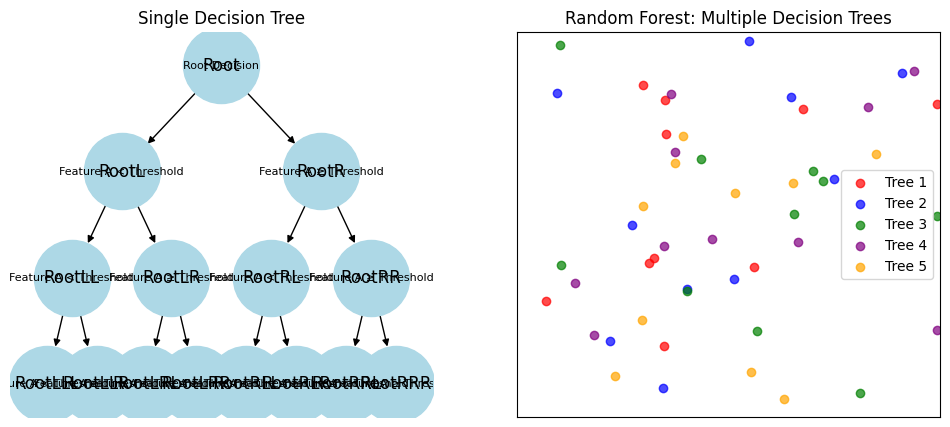

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

# Function to create a simple decision tree diagram
def plot_decision_tree(ax, levels=3, branching_factor=2):
    G = nx.DiGraph()
    pos = {}
    node_labels = {}
    
    # Create tree structure
    def add_nodes_edges(parent, level, x, y, dx):
        if level > levels:
            return
        left_child = f"{parent}L"
        right_child = f"{parent}R"
        G.add_edge(parent, left_child)
        G.add_edge(parent, right_child)
        pos[left_child] = (x - dx, y - 1)
        pos[right_child] = (x + dx, y - 1)
        node_labels[left_child] = "Feature A < Threshold"
        node_labels[right_child] = "Feature A ≥ Threshold"
        
        add_nodes_edges(left_child, level + 1, x - dx, y - 1, dx / 2)
        add_nodes_edges(right_child, level + 1, x + dx, y - 1, dx / 2)
    
    # Root node
    root = "Root"
    G.add_node(root)
    pos[root] = (0, 0)
    node_labels[root] = "Root Decision"
    
    add_nodes_edges(root, 1, 0, 0, 1)
    
    nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightblue", ax=ax)
    nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=8, ax=ax)
    ax.set_title("Single Decision Tree")

# Plot Random Forest Diagram
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot a single decision tree
plot_decision_tree(axs[0])

# Random Forest Illustration
axs[1].set_xlim(0, 10)
axs[1].set_ylim(0, 10)
axs[1].set_title("Random Forest: Multiple Decision Trees")

colors = ["red", "blue", "green", "purple", "orange"]
for i in range(5):
    x = np.random.rand(10) * 10
    y = np.random.rand(10) * 10
    axs[1].scatter(x, y, color=colors[i], label=f"Tree {i+1}", alpha=0.7)

axs[1].legend()
axs[1].set_xticks([])
axs[1].set_yticks([])
plt.show()
